 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%">  Circuit Analysis </span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```RC Circuits```, ```Circuit Analysis```, ```Arduino```

# I. Introduction
<br>
<div class="title"style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

## <div style="color:#00a0e4"> 1. Background </div>

This session aims at exploring basic circuit analysis in the time and frequency domains, as well as further illustrating the use of Arduino as laboratory equipment. 


<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    If you have difficulties with the hardware setup, use Tinkercad. <br/>Files with pre-recorded data are also provided for some experiments.
</div>
</div>

## <div style="color:#00a0e4"> 2. Objectives</div>
* Revisit basic circuit analysis
* Use Arduino-type systems as a basic function generator and signal visualizer 
* Explore experimental characterization of electronic circuits



## <div style="color:#00a0e4"> 3. Materials (optional) </div>
* Arduino IDE
* 1x Breadboard
* 5x Jumper wires
* 4x 10kOhm resistors
* 1x 100nF capacitor
* 1x Arduino (or analogous device)
* 1x USB cable

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

Mount the passive RC circuit of Figure 1 using the materials available in your kit.

<img src="rccircuit-r1-30k.png" width=400/>

<div width="100%" align="center">Figure 1 - RC passive test circuit</div>

# III. Explore
<br>
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

## <div style="color:#00a0e4">  1. Quizz </div>

1) Derive the voltages ($v$) and currents ($i$) displayed in the circuit when a DC voltage, (e.g. $v_i$ = $V_{cc}$) is applied at the input.

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    $V_{cc}$ = 5.0V on the Seeeduino Nano<br/>$V_{cc}$ = 3.3V on the Seeeduino XIAO
</div>
</div>

|       | Derived |       | Derived |
| ----- |:-------:| ------|:-------:|
| $v_i$ |         | $i_1$ |         |
| $v_o$ |         | $i_2$ |         |
| $v_c$ |         | $i_c$ |         |
| $v_1$ |         |       |         |

2)  Derive the transfer function $G(s)=v_o(s)/v_i(s)$ and the frequency response, $H(ω)$. What type of filter is this circuit? Characterize it according the following parameters:

    a) DC gain
    b) -3dB cut-off frequency
    c) High frequency asymptotic decay slope.

3) Using your Arduino-based square wave generator and analog voltage meter firmware, apply a 20Hz square wave with amplitude $[0; V_{cc}]$ as vi and record $v_i$ and vo as time series using a 750 $\mu$S sampling period (a 1Mbps baud rate is recommended). Compare $v_o$ with the voltage derived in 1), and discuss your overall observations.

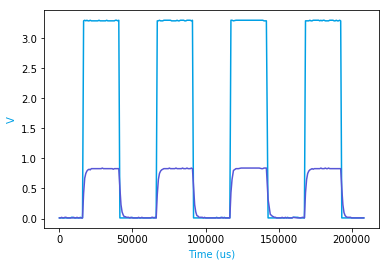

In [27]:
import pylab as pl
import matplotlib.pyplot as plt

fname = './data/L4.3.csv'

dados = pl.loadtxt(fname,  delimiter = ',')

n = 250

t = dados[:n, 0]-dados[0,0]
vi = dados[:n, 1]
vo = dados[:n, 2]

plt.xlabel('Time (us)', color = "#00a0e4")
plt.ylabel('V', color = "#00a0e4")

plt.plot(t, vi, color = "#00a0e4")
plt.plot(t, vo, color = "#5756d6")

plt.show()

4) The following Table presents the magnitude measurements of $v_o$, for the following variant of the circuit presented in Figure 1, where $R_1 = 1kΩ$, having sine waves of different frequencies with 1 $V_{pp}$ as input, $v_i$. Display these results in the semi-log plot in the next page in dBs ($20.log(v_o/v_i)$), and draw the asymptotic frequency response, derived from the transfer function obtained in 2), over the experimental points in the Table.

<img src="rccircuit.png" width=400/>

In [9]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

fname = './data/L4.4.csv'

dados = pd.read_csv(fname,  delimiter = ',', usecols=(1,2))

dados

,Freq. (Hz),Vpp (mV)
0,5.0,940.20
1,10.0,940.20
2,50.0,930.40
3,100.0,930.40
4,500.0,918.20
5,1000.0,880.70
6,1500.0,820.90
7,2000.0,750.80
8,2500.0,690.30
9,3000.0,630.20


<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a015/asymptoticfrequencyresponse.png?raw=true" width=800/>


<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Prof. João Sanches; Prof. Hugo Plácido da Silva; Joana Pinto```